<a href="https://colab.research.google.com/github/tiwari0809/House-Price-Prediction_Project/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chennai House Price Prediction**

**Problem Statement**
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and **also help the sellers understand what factors are fetching more money for the houses?**


**Minimum Requirements**
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.


In [1]:
# Importing the Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
import datetime as dt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sb.set_style("darkgrid")

In [2]:
# Importing the Data Set
house = pd.read_csv("/content/train-chennai-sale.csv")

In [3]:
# Columns in the Data
house.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [4]:
# First 10 rows of the Dataset
house.head(n = 10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,...,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,No,...,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
7,P09679,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,No,...,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250
8,P03377,Chrompet,771,06-04-2011,175,1.0,1.0,2,AdjLand,No,...,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,...,ELO,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650


**EDA**

In [5]:
house.isna().sum() #Check for Null Values.

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [6]:
house=house.dropna() #clean the null value

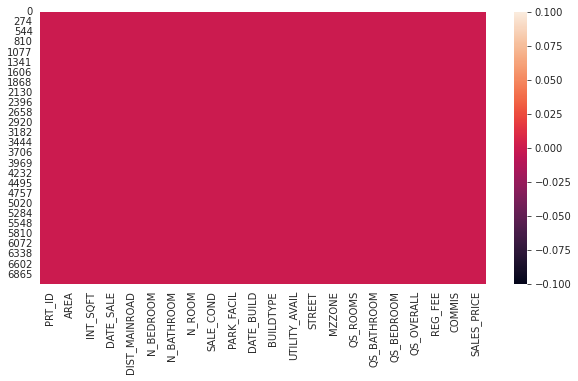

In [7]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sb.heatmap(house.isnull())

In [8]:
house.dtypes #checking the data type 

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [9]:
house=house.astype({"N_BEDROOM":int,'N_BATHROOM':int}) # converting datatype float to int.

In [10]:
house['DATE_BUILD']=pd.to_datetime(house['DATE_BUILD']) # converting date build type to datetime.
house['DATE_SALE']=pd.to_datetime(house['DATE_SALE'])

In [11]:
house['Age_Bldg']=(house['DATE_SALE']- house['DATE_BUILD']).astype('timedelta64[Y]').astype('int') # Adding Age_Bldg of house and replacing DATE_SALE & DATE_BUILD.

In [12]:
house.head(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Age_Bldg
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,43
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,10
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,19
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,21
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,29
5,P00219,Chrompet,1220,2014-11-09,36,2,1,4,Partial,No,...,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750,4
6,P09105,Chrompet,1167,2007-05-04,137,1,1,3,Partial,No,...,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790,27
7,P09679,Velachery,1847,2006-03-13,176,3,2,5,Family,No,...,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250,9
8,P03377,Chrompet,771,2011-06-04,175,1,1,2,AdjLand,No,...,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970,34
9,P09623,Velachery,1635,2006-06-22,74,2,1,4,AbNormal,No,...,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650,14


In [13]:
house.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
Age_Bldg                  int64
dtype: object

In [14]:
# Describing the Hosing Dataset
house.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Age_Bldg
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03,7056.000000
mean,1381.316752,99.569161,1.636621,1.213152,3.686650,3.517177,3.505896,3.485332,3.503389,376791.852608,140994.273384,1.088801e+07,23.548186
std,457.860850,57.403870,0.803633,0.409563,1.020011,0.892141,0.897644,0.886814,0.527313,143109.581793,78774.465963,3.769081e+06,12.434205
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,3.000000
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272117.500000,84212.750000,8.266790e+06,13.000000
50%,1369.500000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349444.500000,127640.500000,1.031922e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451030.500000,184449.000000,1.298148e+07,33.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07,55.000000


In [15]:
# Check for Duplicated Records

house.duplicated().sum()

0

There is no Duplicate Records

In [16]:
house.shape

(7056, 23)

In [17]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7056 non-null   object        
 1   AREA           7056 non-null   object        
 2   INT_SQFT       7056 non-null   int64         
 3   DATE_SALE      7056 non-null   datetime64[ns]
 4   DIST_MAINROAD  7056 non-null   int64         
 5   N_BEDROOM      7056 non-null   int64         
 6   N_BATHROOM     7056 non-null   int64         
 7   N_ROOM         7056 non-null   int64         
 8   SALE_COND      7056 non-null   object        
 9   PARK_FACIL     7056 non-null   object        
 10  DATE_BUILD     7056 non-null   datetime64[ns]
 11  BUILDTYPE      7056 non-null   object        
 12  UTILITY_AVAIL  7056 non-null   object        
 13  STREET         7056 non-null   object        
 14  MZZONE         7056 non-null   object        
 15  QS_ROOMS       7056 n

In [18]:
for column in house.columns:
  print(house[column].value_counts())
  print("*"*20)

P03210    1
P07534    1
P06158    1
P01307    1
P09516    1
         ..
P04550    1
P04710    1
P06791    1
P09761    1
P09794    1
Name: PRT_ID, Length: 7056, dtype: int64
********************
Chrompet      1671
Karapakkam    1356
KK Nagar       989
Velachery      973
Anna Nagar     772
Adyar          768
T Nagar        490
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64
********************
1781    18
1538    15
1514    13
1505    13
1634    12
        ..
559      1
2479     1
1330     1
880      1
598      1
Name: INT_SQFT, Length: 1698, dtype: int64
********************
2009-06-10    12
2010-11-17    10
2012-03-15    10
2011-12-04    10
2009-06-01    10
              ..
2006-05-03     1
2006-06-25     1
2004-04-09     1
2012-03-10     1
2005-07-13     1
Name: DATE_SALE, Length: 2794, dtype: int64
********************


In [19]:
house=house.drop(['PRT_ID','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','DATE_SALE','DATE_BUILD','QS_OVERALL','REG_FEE','COMMIS'],axis=1)
house # Removing the coloum that are not in use

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,Age_Bldg
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,43
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,10
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,19
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,9630290,21
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,5353000,49
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,10818480,8
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,8351410,28
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,8507000,31


**1.** **AREA** 





In [20]:
house['AREA'].unique() 

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

Replacing the AREA categories with correct names.

In [21]:
house['AREA'] = house['AREA'].replace({"Karapakam":"Karapakkam","Ann Nagar":"Anna Nagar","Ana Nagar":"Anna Nagar","Adyr":"Adyar","Chrompt":"Chormpet","Chrmpet":"Chormpet","Chrompet":"Chormpet","Velachery":"Velchery","TNagar":"T Nagar","KKNagar":"KK Nagar"})

In [22]:
house['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velchery', 'Chormpet',
       'KK Nagar', 'T Nagar'], dtype=object)

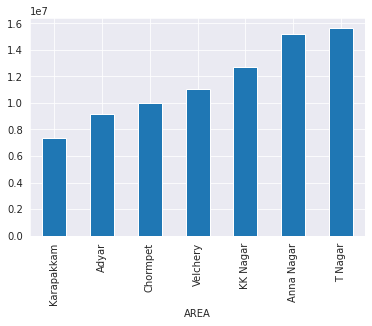

In [23]:
house.groupby('AREA')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar() # Relationship between area and sales price (linear relations) then we go for label encording.

In [24]:
AREA={'Karapakkam':0,'Adyar':1,'Chormpet':2,'Velchery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6} # label encording.

Chormpet      1691
Karapakkam    1359
KK Nagar       990
Velchery       975
Anna Nagar     777
Adyar          769
T Nagar        495
Name: AREA, dtype: int64 



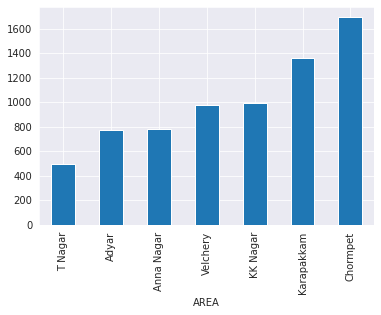

In [25]:
print(house["AREA"].value_counts(),"\n")
house.groupby('AREA')['SALES_PRICE'].count().sort_values(ascending=True).plot.bar()

In [26]:
house.loc[90]

AREA                  Adyar
INT_SQFT               1025
DIST_MAINROAD           125
N_BEDROOM                 1
N_BATHROOM                1
N_ROOM                    3
SALE_COND           Partial
PARK_FACIL               No
BUILDTYPE        Commercial
UTILITY_AVAIL        NoSeWa
STREET                Paved
MZZONE                    I
SALES_PRICE        10934875
Age_Bldg                 25
Name: 90, dtype: object

**2**. **INT_SQFT**

In [27]:
house['INT_SQFT'].unique()

array([1004, 1986,  909, ...,  688, 2051,  598])

In [28]:
house["INT_SQFT"].describe()

count    7056.000000
mean     1381.316752
std       457.860850
min       500.000000
25%       991.000000
50%      1369.500000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

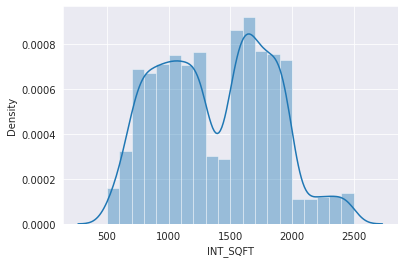

In [29]:
sb.distplot(a = house["INT_SQFT"], bins = 20) # distribution feature

In [30]:
fig= px.scatter(house,x='INT_SQFT',y='SALES_PRICE') # With Sales Price.
fig.show()

**3. DIST_MAINROAD**

In [31]:
house['DIST_MAINROAD'].unique()

array([131,  26,  70,  14,  84,  36, 137, 176, 175,  74,  78, 143,  83,
       157, 134,  69, 168,  53,  96, 114, 100, 111, 105,  29,  59, 185,
       138, 173,  15, 117,  16, 130,  46, 180,  52,  86,  49, 113,  28,
        51,  19, 167, 126,  75, 154,  25, 187, 200,  32,  11,  23,  13,
        58,  89,  48, 177, 116,  41, 192,  72, 148,  24,  43,  85, 171,
        73,  62, 145, 125, 121, 129,   6, 103,   8,  50,  67,   0, 147,
        71,  34, 178, 106, 144, 135,  38,  40, 142,  79,  20,  99, 166,
        63,  44,  60,  90, 169, 122, 108,  98,  57, 104,   1, 109, 164,
       136,  97,  37,   9, 181,  93,  81, 193,  95, 196,  39, 141, 158,
       174,  94, 124,  82,  76, 190, 194,  54,  64,  65, 115,  17, 102,
        77, 182, 163,  88,  66, 119,  18, 188, 112, 159,   4, 123,  31,
         2, 120, 184, 170, 110,   7, 152,  27, 198, 183,  12,  45, 161,
        30, 118,  33,  61, 156, 191, 160, 149, 140,  47, 153, 146, 128,
        80,  55, 151,   3,  92,  22,  35, 101, 127, 199, 132,  2

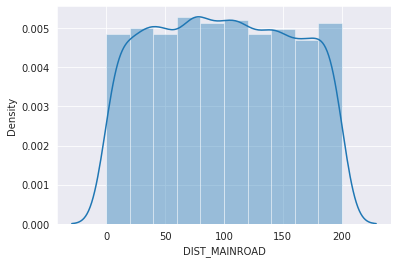

In [32]:
sb.distplot(a = house["DIST_MAINROAD"], bins = 10) # distribution feature

In [33]:
fig= px.scatter(house,x='DIST_MAINROAD',y='SALES_PRICE') # With Sales Price.
fig.show()

**4. N_BEDROOM**

In [34]:
house['N_BEDROOM'].unique()

array([1, 2, 3, 4])

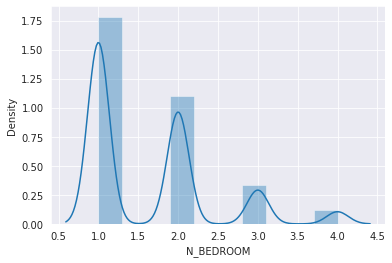

In [35]:
sb.distplot(a = house["N_BEDROOM"], bins = 10) # distribution feature

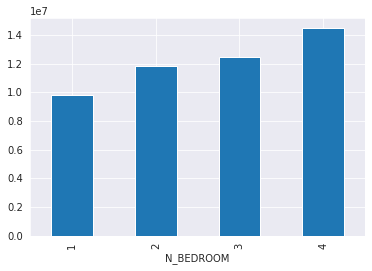

In [36]:
house.groupby('N_BEDROOM')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar() # With Sales Price.

1    3773
2    2327
3     703
4     253
Name: N_BEDROOM, dtype: int64 



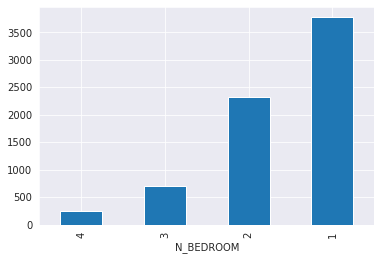

In [37]:
print(house["N_BEDROOM"].value_counts(),"\n")
house.groupby('N_BEDROOM')['SALES_PRICE'].count().sort_values(ascending=True).plot.bar()

**5.N_BATHROOM**

In [38]:
house['N_BATHROOM'].unique()

array([1, 2])

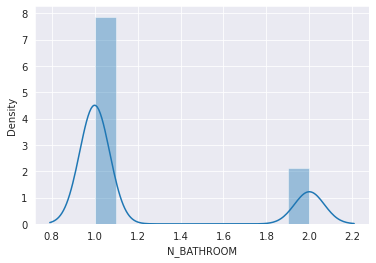

In [39]:
sb.distplot(a = house["N_BATHROOM"], bins = 10) # distribution feature

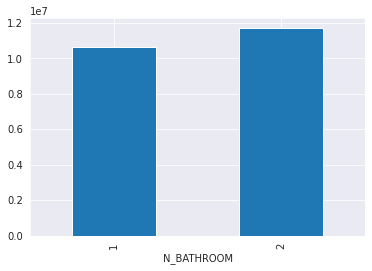

In [40]:
house.groupby('N_BATHROOM')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar() # With Sales Price.

1    5552
2    1504
Name: N_BATHROOM, dtype: int64 



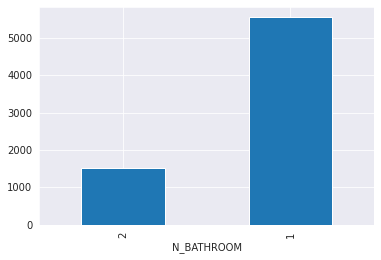

In [41]:
print(house["N_BATHROOM"].value_counts(),"\n")
house.groupby('N_BATHROOM')['SALES_PRICE'].count().sort_values(ascending=True).plot.bar()

**6. N_ROOM**

In [42]:
house['N_ROOM'].unique() 

array([3, 5, 4, 2, 6])

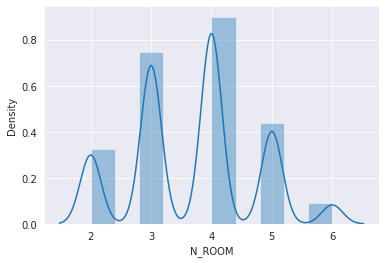

In [43]:
sb.distplot(a = house["N_ROOM"], bins = 10) # distribution feature

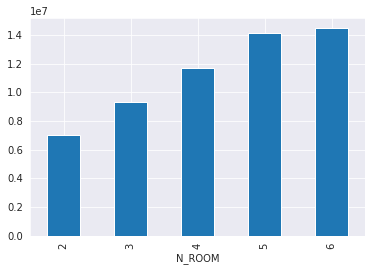

In [44]:
house.groupby('N_ROOM')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

4    2539
3    2112
5    1233
2     919
6     253
Name: N_ROOM, dtype: int64 



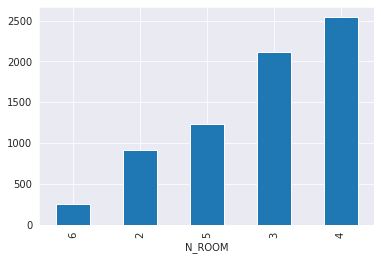

In [45]:
print(house["N_ROOM"].value_counts(),"\n")
house.groupby('N_ROOM')['SALES_PRICE'].count().sort_values(ascending=True).plot.bar()

**7. SALE_COND**

In [46]:
house['SALE_COND'].unique() 

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [47]:
house['SALE_COND'] = house['SALE_COND'].replace({'Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial','AdjLand':'Adj Land'}) # Replacing the SALE_COND categories with correct names.

In [48]:
house['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

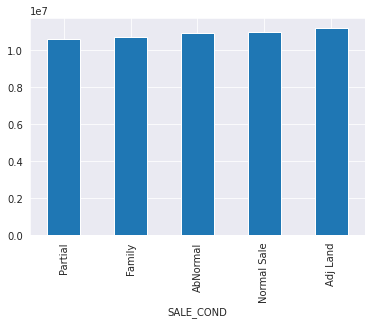

In [49]:
house.groupby('SALE_COND')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [50]:
dummies = pd.get_dummies(house.SALE_COND) # No linear realtion between SALE_COND & SALES_PRICE then we go for One hot encording.
dummies.head(5)

,AbNormal,Adj Land,Family,Normal Sale,Partial
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,1,0,0,0,0


Adj Land       1432
Partial        1417
Normal Sale    1416
AbNormal       1401
Family         1390
Name: SALE_COND, dtype: int64 



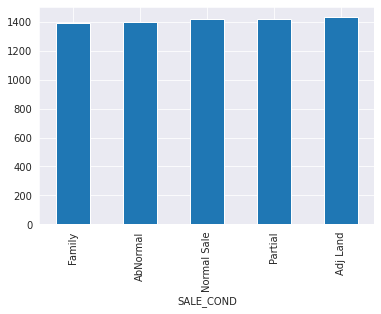

In [51]:
print(house["SALE_COND"].value_counts(),"\n")
house.groupby('SALE_COND')['SALES_PRICE'].count().sort_values(ascending=True).plot.bar() #Sales price preduction.

**8. PARK_FACIL**

In [52]:
house['PARK_FACIL'].unique() 

array(['Yes', 'No', 'Noo'], dtype=object)

In [53]:
house['PARK_FACIL'] = house['PARK_FACIL'].replace({'Noo':'No'}) # Replacing the PARK_FACIL categories with correct names.

In [54]:
house['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [55]:
PARK_FACIL={'No':0,'Yes':1} # label encording.

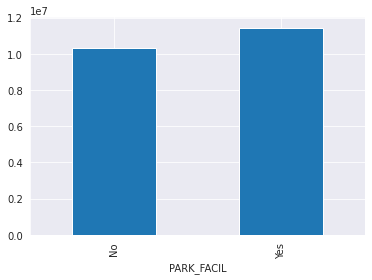

In [56]:
house.groupby('PARK_FACIL')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

Yes    3557
No     3499
Name: PARK_FACIL, dtype: int64 



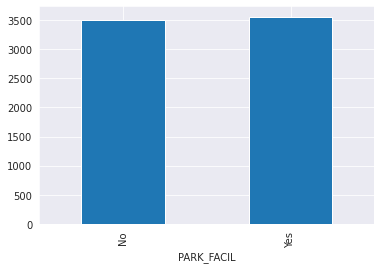

In [57]:
print(house["PARK_FACIL"].value_counts(),"\n")
house.groupby('PARK_FACIL')['SALES_PRICE'].count().sort_values(ascending=True).plot.bar() #Sales price preduction.

**9. BUILDTYPE**

In [58]:
house['BUILDTYPE'].unique() 

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [59]:
house['BUILDTYPE'] = house['BUILDTYPE'].replace({'Comercial':'Commercial','Other':'Others'}) # Replacing the BUILDTYPE categories with correct names.

In [60]:
house['BUILDTYPE'].unique() 

array(['Commercial', 'Others', 'House'], dtype=object)

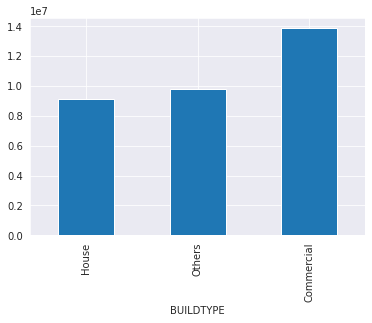

In [61]:
house.groupby('BUILDTYPE')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [62]:
BUILDTYPE={'Commercial':0,'Others':1,'House':2} # label encording.

House         2433
Others        2312
Commercial    2311
Name: BUILDTYPE, dtype: int64 



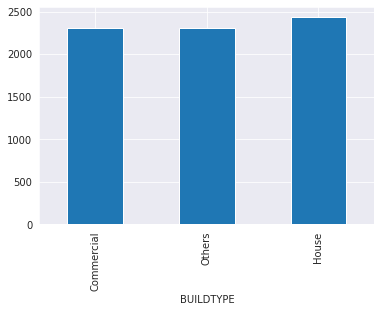

In [63]:
print(house["BUILDTYPE"].value_counts(),"\n")
house.groupby('BUILDTYPE')['SALES_PRICE'].count().sort_values(ascending=True).plot.bar() #Sales price preduction.

**10. UTILITY_AVAIL**

In [64]:
house['UTILITY_AVAIL'].unique() 

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [65]:
house['UTILITY_AVAIL'] = house['UTILITY_AVAIL'].replace({'All Pub':'AllPub'}) # Replacing the UTILITY_AVAIL categories with correct names.

In [66]:
house['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

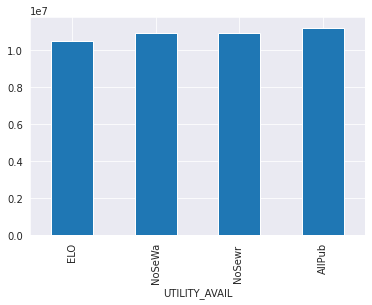

In [67]:
house.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [68]:
dummies = pd.get_dummies(house.UTILITY_AVAIL) # No linear realtion between UTILITY_AVAIL & SALES_PRICE then we go for One hot encording.
dummies.head(3)

,AllPub,ELO,NoSeWa,NoSewr
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0


AllPub     1875
NoSeWa     1860
NoSewr     1812
ELO        1509
Name: UTILITY_AVAIL, dtype: int64 



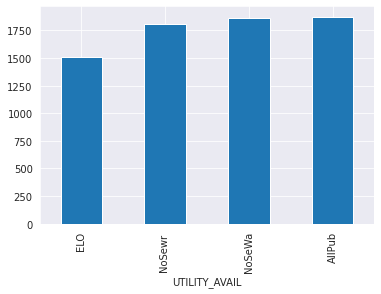

In [69]:
print(house["UTILITY_AVAIL"].value_counts(),"\n")
house.groupby('UTILITY_AVAIL')['SALES_PRICE'].count().sort_values(ascending=True).plot.bar() #Sales price preduction.

**11. STREET**

In [70]:
house['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [71]:
house['STREET'] = house['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'}) # Replacing the STREET categories with correct names.

In [72]:
house['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

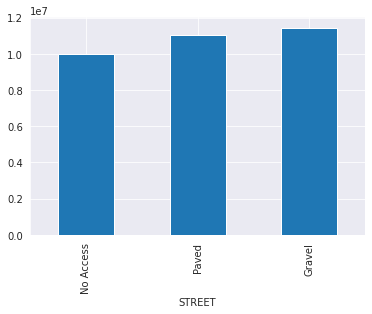

In [73]:
house.groupby('STREET')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [74]:
STREET={'No Access':0,'Paved':1,'Gravel':2} # Label Encording.

Paved        2554
Gravel       2502
No Access    2000
Name: STREET, dtype: int64 



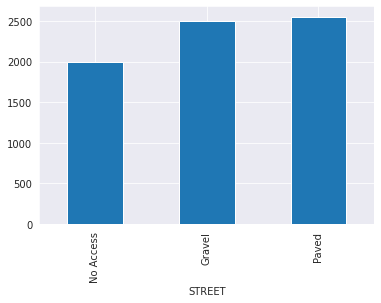

In [75]:
print(house["STREET"].value_counts(),"\n")
house.groupby('STREET')['SALES_PRICE'].count().sort_values(ascending=True).plot.bar() #Sales price preduction.

**12. MZZONE**

In [76]:
house['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

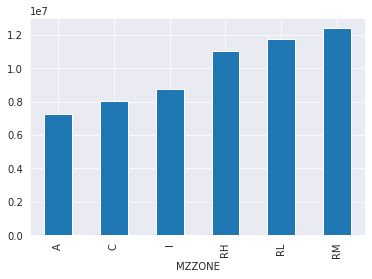

In [77]:
house.groupby('MZZONE')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar() # Relationship between MZZONE and sales price (linear relations) then we go for label encording.

In [78]:
MZZONE={'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5} # Label Encording.

RL    1849
RH    1808
RM    1801
C      547
A      533
I      518
Name: MZZONE, dtype: int64 



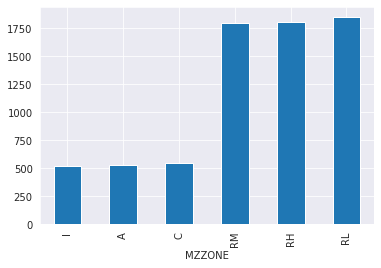

In [79]:
print(house["MZZONE"].value_counts(),"\n")
house.groupby('MZZONE')['SALES_PRICE'].count().sort_values(ascending=True).plot.bar() #Sales price preduction.
#fig= px.scatter(house,x='MZZONE',y='SALES_PRICE') # With Sales Price.
#fig.show()

**13. Age_Bldg**

In [80]:
house['Age_Bldg'].unique()

array([43, 10, 19, 21, 29,  4, 27,  9, 34, 14, 36, 25, 53, 17, 30, 41,  3,
       15, 33,  7, 38,  8,  5, 26, 12, 39, 35, 47, 46, 11, 48, 45, 23, 24,
       54, 20, 28, 32,  6, 42, 37, 16, 13, 31, 40, 49, 22, 52, 18, 50, 44,
       51, 55])

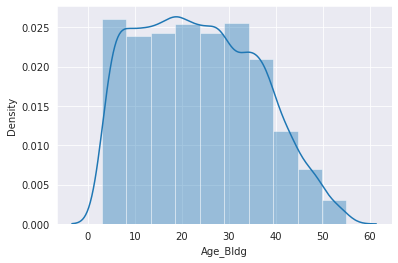

In [81]:
sb.distplot(a = house["Age_Bldg"], bins = 10)

In [82]:
fig= px.scatter(house,x='Age_Bldg',y='SALES_PRICE') # With Sales Price.
fig.show()

In [83]:
from sklearn.preprocessing import LabelEncoder  # Converting data type to 'int or float' because in regression model 'object' data type can't be read.
le = LabelEncoder()
for col in house.columns:
    if house[col].dtypes == 'object':
        house[col] = le.fit_transform(house[col])

**Correlation between the columns**

(14.5, -0.5)

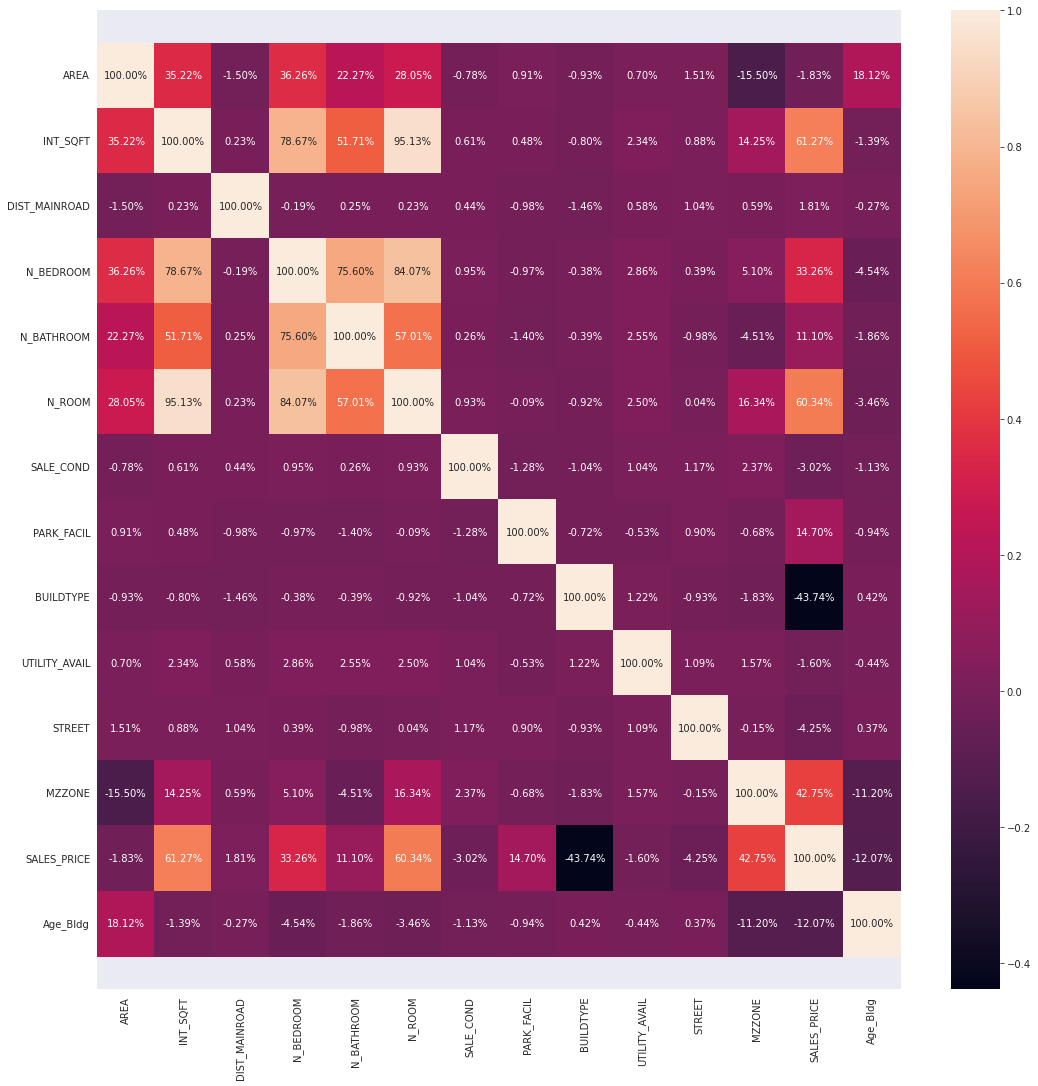

In [84]:
corr = house.corr()
corr

plt.figure(figsize = (18, 18))
sb.heatmap(data = corr, fmt = '.2%', annot = True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

In [85]:
house.dtypes

AREA             int64
INT_SQFT         int64
DIST_MAINROAD    int64
N_BEDROOM        int64
N_BATHROOM       int64
N_ROOM           int64
SALE_COND        int64
PARK_FACIL       int64
BUILDTYPE        int64
UTILITY_AVAIL    int64
STREET           int64
MZZONE           int64
SALES_PRICE      int64
Age_Bldg         int64
dtype: object

**Build a Model Now...**

In [86]:
X = house.drop(columns=['SALES_PRICE'])

In [87]:
y=house["SALES_PRICE"]

**Linear Regression**

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [89]:
print(X_train.shape)
print(X_test.shape)

(5644, 13)
(1412, 13)


In [90]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7916037042635726

In [91]:
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  79.16037042635726


**RandomForestRegressor**

In [92]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,random_state = 0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [93]:
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  98.09688359106244


**GradientBoostingRegresso**

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [95]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4)

In [96]:
print("Accuracy --> ", GBR.score(X_test, y_test)*100)

Accuracy -->  99.08379262611955


In [97]:
GBR.predict([[1300,1,3,4,1,2,2,2,4,2,0,3,2]])

array([7189965.94562926])

**Use K Fold cross validation to measure accuracy of our LinearRegression model**.

In [98]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=40)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.78716576, 0.79947407, 0.78546927, 0.79406414, 0.79888042])

**Find best model using GridSearchCV**

In [99]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=40)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.793011,{'normalize': True}
1,lasso,0.793011,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.970267,"{'criterion': 'mse', 'splitter': 'random'}"


In [100]:
#Currency Conversion
from babel.numbers import format_currency

In [101]:
valu=GBR.predict([[1847,2,3,4,1,2,2,1,3,2,0,3,1]])
low=int(valu-(valu*0.01))
low = format_currency(low, 'INR', locale='en_IN')
high=int(valu+(valu*0.01))
high = format_currency(high, 'INR', locale='en_IN')
print('Estimated value is:',low , 'to', high)

Estimated value is: ₹71,18,066.00 to ₹72,61,865.00
